# <center> Solving Sudoku </center> 
In this section, I explore how to write a program for solving Sudoku puzzles. A conceptual overview of each of the underlying components is provided before exploring their roles in the code. But first, a quick review of the rules and a note on terminology.


## [The Rules of Sudoku](#The-Rules-of-Sudoku)
The rules of Sudoku are simple. A Sudoku board is a grid comprised of nine rows, nine columns, and nine smaller 3x3 sub grids known as _units_. The goal is to complete the grid in such a way that each row, column, and unit contains each of the numbers 1-9 exactly once. There can be no missing or duplicated digits in a given section. 

A Sudoku puzzle is solved when all the empty cells have been filled with valid numbers, none of which break the "one of each number per section" rule. For a given puzzle, there is only one solution, or one combination of answers which don't violate the constraints. 

## [Terminology](#Terminology)
Creating some quick, shared terminology can help to explain the concepts more succinctly:
- __Cell__: A certain location on a Sudoku grid.
- __Board__: A certain combination of answers and/or empty spaces that make up a given Sudoku grid. 

## [Modeling Sudoku as a Search Problem](#Modeling-Sudoku-as-a-Search_Problem)
Sudoku puzzles can be solved by several different algorithms which approach the task of solving the puzzle differently. One approach is to model Sudoku as a _search problem_. This approach frames the problem in terms of a starting state, a goal state, and a set of interim states that are traversed in order to reach the goal state. When applied to Sudoku, the starting state is the unsolved puzzle, the goal state is the completed puzzle, and the interim state is the set of all partially completed boards that are created as the method approaches the goal state (below, only a single partially solved board is shown). Solving mazes, studying chess, and finding the shortest path between two points can also be modeled as search problems. 

<table class="image">
<tr>
    <td> <img src="http://drive.google.com/uc?export=view&id=1wg3ltMk62ym4jOqo0eHbr0JCy6p8WCgA" style="width: 250px;"/>  </td>
    <td> <img src="http://drive.google.com/uc?export=view&id=1dQ0N0Pq6DJWSfkNR4hQ6JUDdBCNDGDZw"  style="width: 250px;"/> </td>
    <td> <img src="http://drive.google.com/uc?export=view&id=12qzVUiSvJDIIr9O2bzfGi0t-t9mHg5gD"  style="width: 250px;"/> </td>
    </tr>
</table>

## [Solving  Sudoku](#Solving-Sudoku)
Approaching Sudoku as a search problem, our solving algorithm will be comprised of three underlying components:
1. __Generative Recursion__: The first component of our algorithm  will be the portion responsible for actually solving the puzzle. This is accomplished by recursively generating incrementally more solved Sudoku boards, based on an original board, until the correct combination of answers is found. In the process, thousands of  boards that are ultimately determined to be incorrect must be generated. 
2. __Tree Data Structure__: The second component will be to organize the thousands of generated boards in to a data structure. Organizing the Sudoku boards in to a data structure is necessary to link the starting Soduko board with the completed Sudoku board. The data structure being used is a _tree_.
3. __Backtracking Search__: Lastly, we need some way to navigate through the tree data structure from the initial Sudoku board to the solved board. This will be accomplished using the backtracking traversal method.


### [Generative Recursion](#Generative-Recursion)


Recursion refers to the ability of a program to call itself in its own execution, and is one of the most useful paradigms in computer science. All recursive functions rely on two underlying principles. The first principle is that the function includes some scenario in which the function terminates, referred to as the "base case". The second principle is that with each recursion, the function in some way moves closer to its base case. Without these two caveats, a recursive function will continue to call itself forever. Recursion can be broadly separated in to two groups: _structural recursion_ and _generative recursion_. 

In structural recursion, the data that is passed in to the function with each recursion is in some way a subset of the data passed to the previous recursion. With each iteration the data being operated on is diminished, until eventually all the data is exhausted. When there is no remaining data to be passed in, the function simply ends. In this way, the function is structurally guaranteed to terminate, given that each iteration chips away at the remaining data to be operated on. 


In [3]:
def structural_recursion(data):
    if len(data) == 0:                   ## Base Case: end of data
        return data
    else:
        structural_recursion(data[1:])   ## Else, recursive call with subset of data 

In generative recursion, the data being passed in to the function is _uniquely generated_ with each recursion. Unlike structural recursion, which is guaranteed to terminate, the process of generating unique data with each recursion allows for the possibility of endless recursion. After all, there is no guarantee that the portion responsible for generating new data does so in a way that approaches the base case. Imagine, for example, that the base case is a list of length zero, and that the generative component doubles the size of the list with each recrusion. The base case would never be reached. For this reason, when creating generative recursion functions it's important to make sure that the data will ultimately meet the criteria of the base case. Otherwise, the function will never terminate.

In [1]:
def generative_recursion(data):
    if data == base_case:                         ## Base Case
        return data
    else:
        generative_recursion(generate_data(data)) ## Recursive call with newly generated data

### [Tree Data Structures](#Tree-Data-Structures)

Tree data structures are one of the most important and widely used abstract data types. Unlike one-dimensional models, trees have the ability to represent non-linear data by organizing information in to a hierarchical format. For this reason, trees are ideal candidates for many types of information that are fundamentally two-dimensional and hierarchical in nature. Company organization structures, web-page layout, biological classification trees, file systems, and as it turns out, Sudoku puzzles.
![title](https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg)

### [Backtracking Search](#Backtracking-Search)
Backtracking search, like any search algorithm, traverses data to find a given solution, concluding when the item is found or when the data being searched has been exhausted. However,  backtracking search can only search data of a particular category. Specifically, the backtracking method can only be applied to data which contains a “partial candidate solution”, or data which is a subset of the solution being searched for. Mazes, for example, can be solved using backtracking because the partially completed maze can be represented as a portion of the completed maze.

This style of search offers many advantages. Because the data can be thought of as a subset of the answer, the algorithm can follow promising subsets as they incrementally build toward a solution, or abandon partial candidates which can not possibly contain the solution and “backtrack” to more promising options. This discrimination allows the algorithm to drastically diminish the search space and reduce search time. The image below is a visualization of the bactracking process. 

<table class="image">
<tr>
    <td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Backtracking-no-backjumping.svg/1200px-Backtracking-no-backjumping.svg.png" style="width: 400px;"/>  </td>
    </tr>
</table>

__Figure 2: Backtracking Search, Wikimedia Foundation__



# [Bringing it all Together](#Bringing-it-all-Together)


So we now have the three components of a Sudoku solver: 
    1. Generative recursion
    2. Tree data structure
    3. Backtracking search
    
Let's explore how each of these pieces fit in to the algorithm.

The initial Sudoku board will represent our _root_ node in the tree. The first step is to locate the first empty position, or _cell_, and determine the list of all possible numbers that could fill that position. With this list of possible valid numbers, a set of new Sudoku boards can be created, each with the first empty space filled in by one of the possible solutions. In this way, a single board generates several sub-boards. 

Below, a visualization of the process is provided (thanks to Professor Gregor Kiczales and his excellent course _How to Code: Complex Data_). The first board identifies the first empty cell, determines the possible valid answers, and generates a set of boards for each of the valid possibilities. The process results in a tree structure.

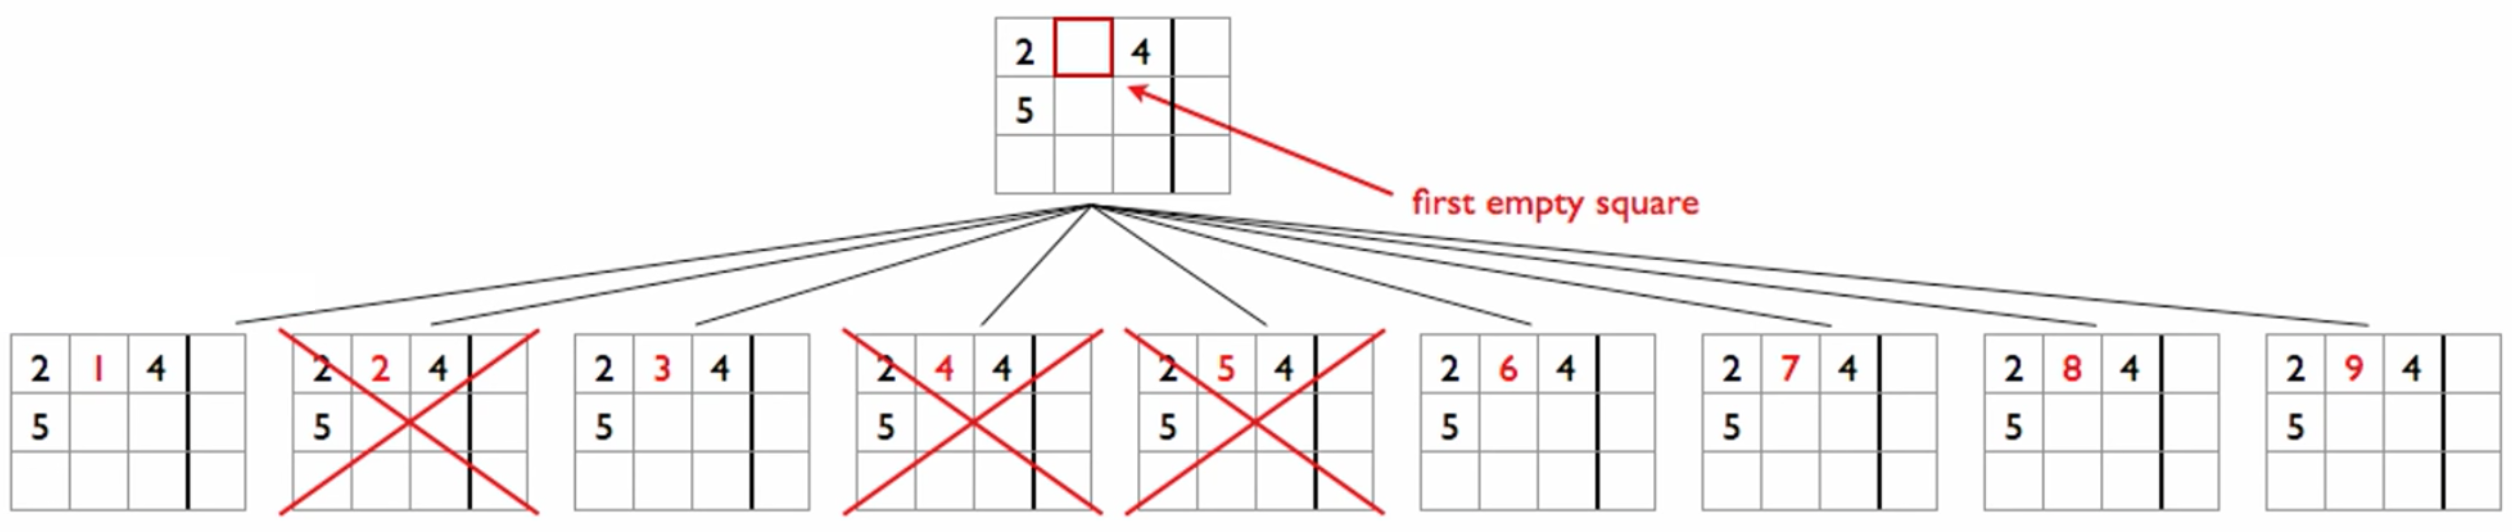

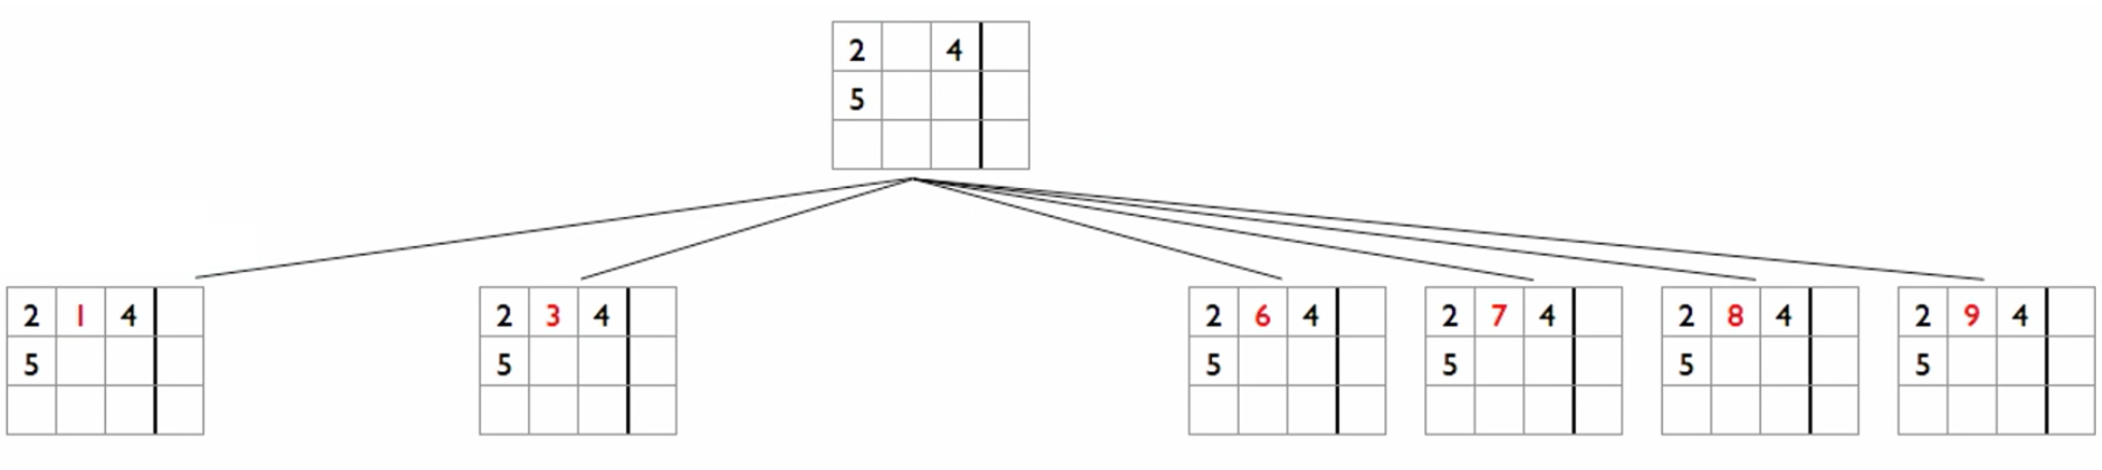
__Figure 3: Kiczales, How to Code: Complex Data__

Once the initial Sudoku board has generated a group of sub-boards, the process is repeated. Each sub-board determines the possible answers for the first remaining unsolved cell and generates an additional set of sub-boards. With each iteration, a new set of boards is created, branching out from their parent board. And each time, one more space is filled with a possible valid answer, incrementally completing the board. 

This recursive process continues until arriving at one of two base cases: 
1. __Dead End__: With each iteration, a cell is assigned an answer based only on the criteria that it it doesn't violate the rules _at the time of its addition_. This means that many boards will be generated with answers that are ultimately proven to be incorrect, but which were plausible when they were added. In the example above for instance, six boards are created, each with a possible answer, but only one of which will ultimately be proven to be _correct_ (remember that Sudoku only allows for one correctly solved board, meaning that each cell has only one possible solution). As a result, branches which are ultimately proven to be fruitless will be pursued until there are no possible valid answers that could be added. These "dead ends" are our queue that somewhere up the line a wrong solution was added.

2. __Solution__: The alternative to arriving at a dead end is arriving at a board for which there are no remaining cells to be filled. A Sudoku in which all the empty cells have been assigned answers, none of which violate the constraints, is another way of describing the solution. Since our method only adds answers that are valid at the time of their inclusion, if valid answers are able to be added until the board is filled, then the solution has been found. After all, Sudoku only allows for one combination of answers which complete the grid without violating the rules.

While this process will always generate a completed Sudoku board (so long as the starting puzzle is valid), it will inevitably create countless incorrect boards along the way. Because there is no way of knowing in advance which branches will ultimately prove to be dead ends, it is necessary to recursively generate sub-boards _up until the point they are proven to be incorrect_, at which point we "backtrack" up to a previous point and pursue another another branch to its conclusion (hence the name of the method, "backtracking"). While this process means that many incorrect branches will need to be pursued to their conclusion, it also means that the correct board will ultimately be found. 

<table class="image">
<tr>
    <td> 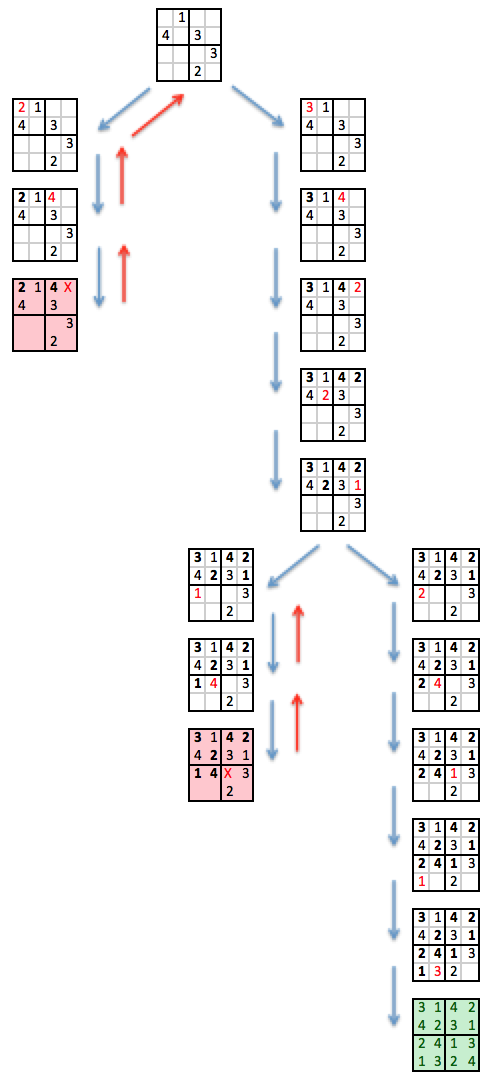  </td>
    </tr>
</table>

# [The Code](#The-Code)

With our three components in place, we can now turn to the code. Each of the three ideas explored above constitute one of the core components of the solving algorithm. 

### [The Foundation: Tree Template](#The-Foundateion:-Tree-Template)
The foundation of the solver will be the template for operating on a tree data structure. Tree data structures are comprised of individual nodes (or in this case, individual Sudoku boards), and lists of nodes (lists of Sudoku boards) to which they are linked. These two data types are mutually referential: individual boards point to lists of boards, and lists of boards are comprised of individual boards. For this reason, templates for tree data structures are comprised of two mutually referential functions. 

The function responsible for individual boards (__solve_board__) essentially has two parts:
1. Do something with the board
2. Pass the list of child boards to the function responsible for lists of boards

The function responsible for lists of boards (__solve_list_of_boards__) also has two parts:
1. _If_ the list is empty, return something
2. _Else_:
    1. Pass the first board in the list to the function responsible for individual boards
    2. Pass the list of remaining boards back to the function responsible for lists of boards (itself)
    3. Combine the results
    
The template can be seen below:

In [ ]:
##              Tree Template
def solve_board(board):
    ... board
        return solve_list_of_boards(...)
        
def solve_list_of_boards(sub_boards):
    if len(sub_boards) == 0:
        return ...
    else:
        return ... (solve_board(sub_boards[0]))
                   (solve_list_of_boards(sub_boards[1:]))

### [Adding Generative Recursion](#Adding-Generative-Recursion)
The next component to add to the solver is generative recursion. Because generative recursion is the portion responsible for creating a list of sub-boards from a given board, it will be implemented inside the function responsible for individual boards and pass its results to the function responsible for lists of boards. As mentioned before, generative recursion functions have two parts:
1. __If__ the base case has been reached, return something
2. __Else__ generate new data and pass it back to the function

In this problem, our base case is that the Sudoku board has been solved. If the board has been solved, there is no need to continue the recursion and the board can simply be returned as the answer. 

If the current board isn't solved, the portion responsible for generating new data creates a list of new Sudoku boards in which the first empty space of the current board has been filled with a valid value, and passes that list to the function responsible for lists of boards.

In [ ]:
##       Tree Template + Generative Recursion
def solve_board(board):
    if solved(board):
        return board
    else:
        return solve_list_of_boards(generate_sub_boards(board))
        
def solve_list_of_boards(sub_boards):
    if len(sub_boards) == 0:
        return ...
    else:
        return ... (solve_board(sub_boards[0]))
                   (solve_list_of_boards(sub_boards[1:]))

### [Adding Backtracking ](#Adding-Backtracking)
With the tree data structure and generative recursion in place, the last component to add is the portion responsible for traversing the data structure. The backtracking method is implemented as part of the function responsible for operating on lists of boards. 

The backtracking method has two parts:
1. Pass the first board in the current list to the function responsible for solving individual boards. If it returns the solved Sudoku board, return the solution.
2. Otherwise, pass the rest of the boards in the current list back to the function responsible for operating on lists of boards and repeat the process with the first board in the _remainder_ of the list.

Because the functions are mutually recursive, the first board will keep being passed to the function for individual boards, which will then pass a list of sub-boards back to the function responsible for lists of boards, which will then pass in the first board of _that_ list, and so on and so forth. Eventually, this process will result in a base case.

When a base case is eventually reached, the result will evaluate back up to its function call. This is the portion responsible for "backtracking" up to a prior point. If the result of pursuing the first board to its conclusion is the solved board, then the answer has been found and the solved board is returned. 

If, instead, pursuing the first board to its conclusion results in a dead end (a far more likely scenario), the first of the _rest_ of the boards at that point in the recursion is pursued. If all of the boards in a list at a given point in the recursion result in dead ends, then the function backtracks further up the structure to pursue earlier branches to their conclusions. 

In [1]:
## Tree Template  +  Generative Recursion  +  Backtracking Search
def solve_board(board):
     if solved(board):
        return board        
     else:
        return solve_list_of_boards(generate_sub_boards(board))
        
def solve_list_of_boards(sub_boards):
    if len(sub_boards) == 0:
        return False
    else:
        if solve_board(sub_boards[0]):
            return solve_board(sub_boards[0])
        else:
            return solve_list_of_boards(sub_boards[1:])

With all of the components of our Sudoku solver in place, the only remaining step is a bit of house keeping. The redundant computation seen in calling "solve_board(sub_boards[0]))" twice can be amended by evaluating the expression once and assigning its value to a variable. That way, the variable can be used in both places instead of recomputing the value. Additionally, the pair of mutually recursive functions can be encapsulated for more efficient namespace management. 

In [ ]:
##  Tree Template + Generative Recursion + Backtracking Search
def solver(board):
    def solve_board(board):
        if solved(board):
            return board        
        else:
            return solve_list_of_boards(generate_sub_boards(board))
        
    def solve_list_of_boards(sub_boards):
        if len(sub_boards) == 0:
            return False
        else:
            first_board_result = solve_board(sub_boards[0])
            if first_board_result:
                return first_board_result
            else:
                return solve_list_of_boards(sub_boards[1:])
            
    return solve_board(board)

The algorithm above constitutes the core of the Sudoku solver. The only remaining components are the pair of helper functions "solved" and "generate_sub_boards". The program code can be seen in its entirety [here](https://github.com/Sam-Rolfe/Sudoku/blob/master/Sudoku_Solver.py).

# [Putting it to the Test](#Putting-it-to-the-Test)

Now the fun part - to test the code! There are countless resources online that provide unsolved Sudoku boards on which to test a solving algorithm. The most robust source I've found is [this](https://www.kaggle.com/bryanpark/sudoku) one, which includes 1 million unsolved Sudoku boards. Thank you Kyubyong Park of Kaggle!

Running the solver in Spyder on my Macbook, the solver was able to complete the __1 million boards__ in a little over an __hour and a half__, with an average solve time of __.0056 seconds per board__. If you'd like to test the code on you computer, my program is available in its entirety [here](https://github.com/Sam-Rolfe/Sudoku/blob/master/Sudoku_Solver.py) and the dataset of unsolved Sudoku boards (reformatted for easier analysis) is available [here](https://github.com/Sam-Rolfe/Sudoku/blob/master/Sudoku%20Datasets/10000%20Unsolved%20Boards.txt). To run the file, simply set the variable "input_data_file" (located at the top of the program) to the file location of the downloaded dataset. Happy solving

# [References](#References)